# Second Assignment - Housing Dataset Analysis
## Data Visualization and Feature Correlation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.style.use('default')
sns.set_palette('viridis')

In [ ]:
# Load DF
df = pd.read_csv('KC_housing_data.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset shape: (4600, 18)
Columns: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


## First 10 Rows - Pretty Display

In [ ]:
# Display first 10 rows with dome cool styling
styled_df = df.head(10).style \
    .background_gradient(cmap='Blues', subset=['price']) \
    .background_gradient(cmap='Greens', subset=['sqft_living']) \
    .format({'price': '${:,.0f}', 'sqft_living': '{:,} sqft'}) \
    .set_caption('First 10 Properties in KC Housing Dataset')

display(styled_df)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,"$313,000",3.000000,1.500000,"1,340 sqft",7912,1.500000,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,"$2,384,000",5.000000,2.500000,"3,650 sqft",9050,2.000000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,"$342,000",3.000000,2.000000,"1,930 sqft",11947,1.000000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,"$420,000",3.000000,2.250000,"2,000 sqft",8030,1.000000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,"$550,000",4.000000,2.500000,"1,940 sqft",10500,1.000000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,"$490,000",2.000000,1.000000,880 sqft,6380,1.000000,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,"$335,000",2.000000,2.000000,"1,350 sqft",2560,1.000000,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,"$482,000",4.000000,2.500000,"2,710 sqft",35868,2.000000,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,"$452,500",3.000000,2.500000,"2,430 sqft",88426,1.000000,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,"$640,000",4.000000,2.000000,"1,520 sqft",6200,1.500000,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


## Dataset Overview

In [ ]:
# Basic info abt DF
print("Dataset Info:")
print(f"Total properties: {len(df):,}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Price range: ${df['price'].min():,.0f} - ${df['price'].max():,.0f}")
print(f"Average price: ${df['price'].mean():,.0f}")

Dataset Info:
Total properties: 4,600
Date range: 2014-05-02 00:00:00 to 2014-07-10 00:00:00
Price range: $0 - $26,590,000
Average price: $551,963


## Feature Correlation Heatmap

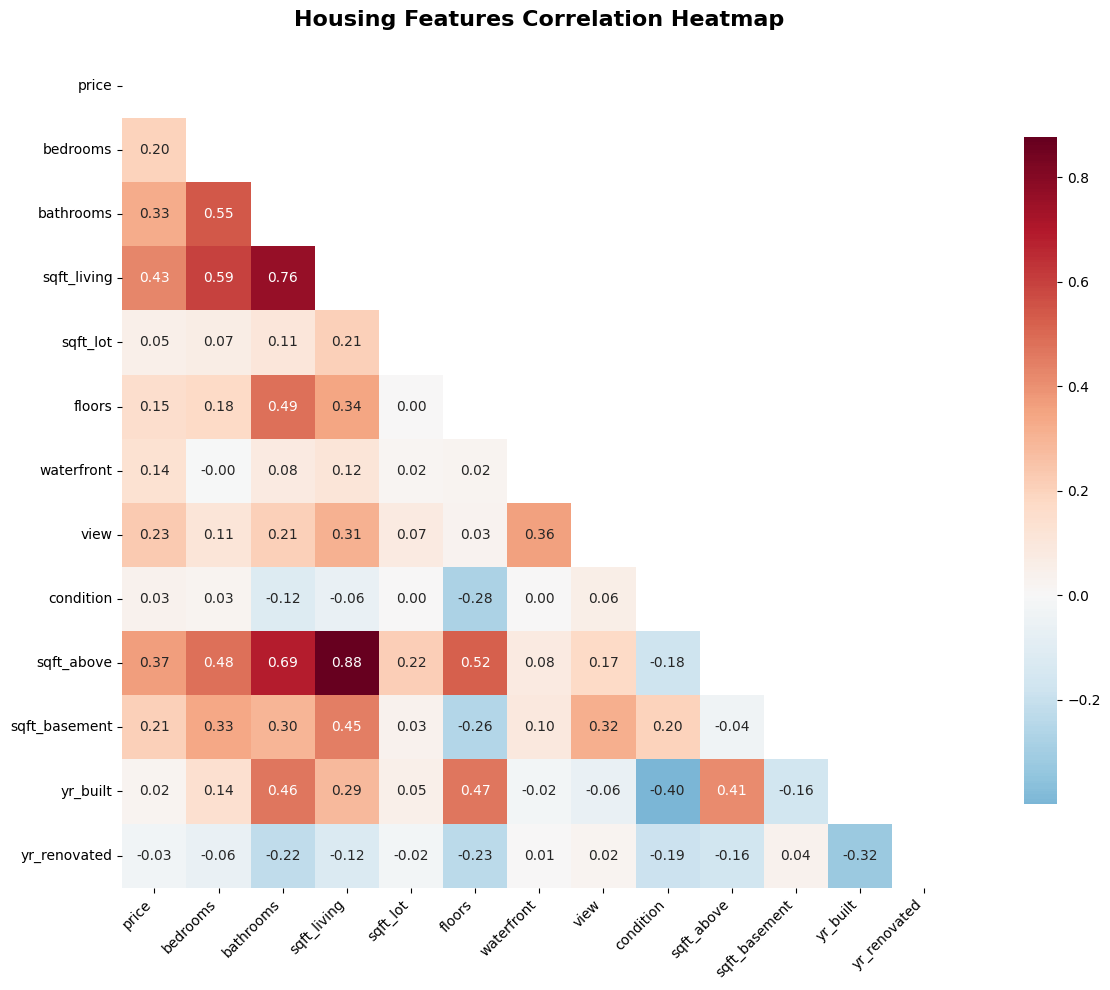

In [ ]:
# Create correlation heatmap, could be usefull tho
plt.figure(figsize=(14, 10))


numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': .8})

plt.title('Housing Features Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Key Statistics

In [ ]:
# Summary statistics for key features, copy paste from stof
key_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition']
print("Summary Statistics:")
print(df[key_features].describe())

Summary Statistics:
              price     bedrooms    bathrooms   sqft_living       floors  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4600.000000   
mean   5.519630e+05     3.400870     2.160815   2139.346957     1.512065   
std    5.638347e+05     0.908848     0.783781    963.206916     0.538288   
min    0.000000e+00     0.000000     0.000000    370.000000     1.000000   
25%    3.228750e+05     3.000000     1.750000   1460.000000     1.000000   
50%    4.609435e+05     3.000000     2.250000   1980.000000     1.500000   
75%    6.549625e+05     4.000000     2.500000   2620.000000     2.000000   
max    2.659000e+07     9.000000     8.000000  13540.000000     3.500000   

         condition  
count  4600.000000  
mean      3.451739  
std       0.677230  
min       1.000000  
25%       3.000000  
50%       3.000000  
75%       4.000000  
max       5.000000  


## Distribution Plots

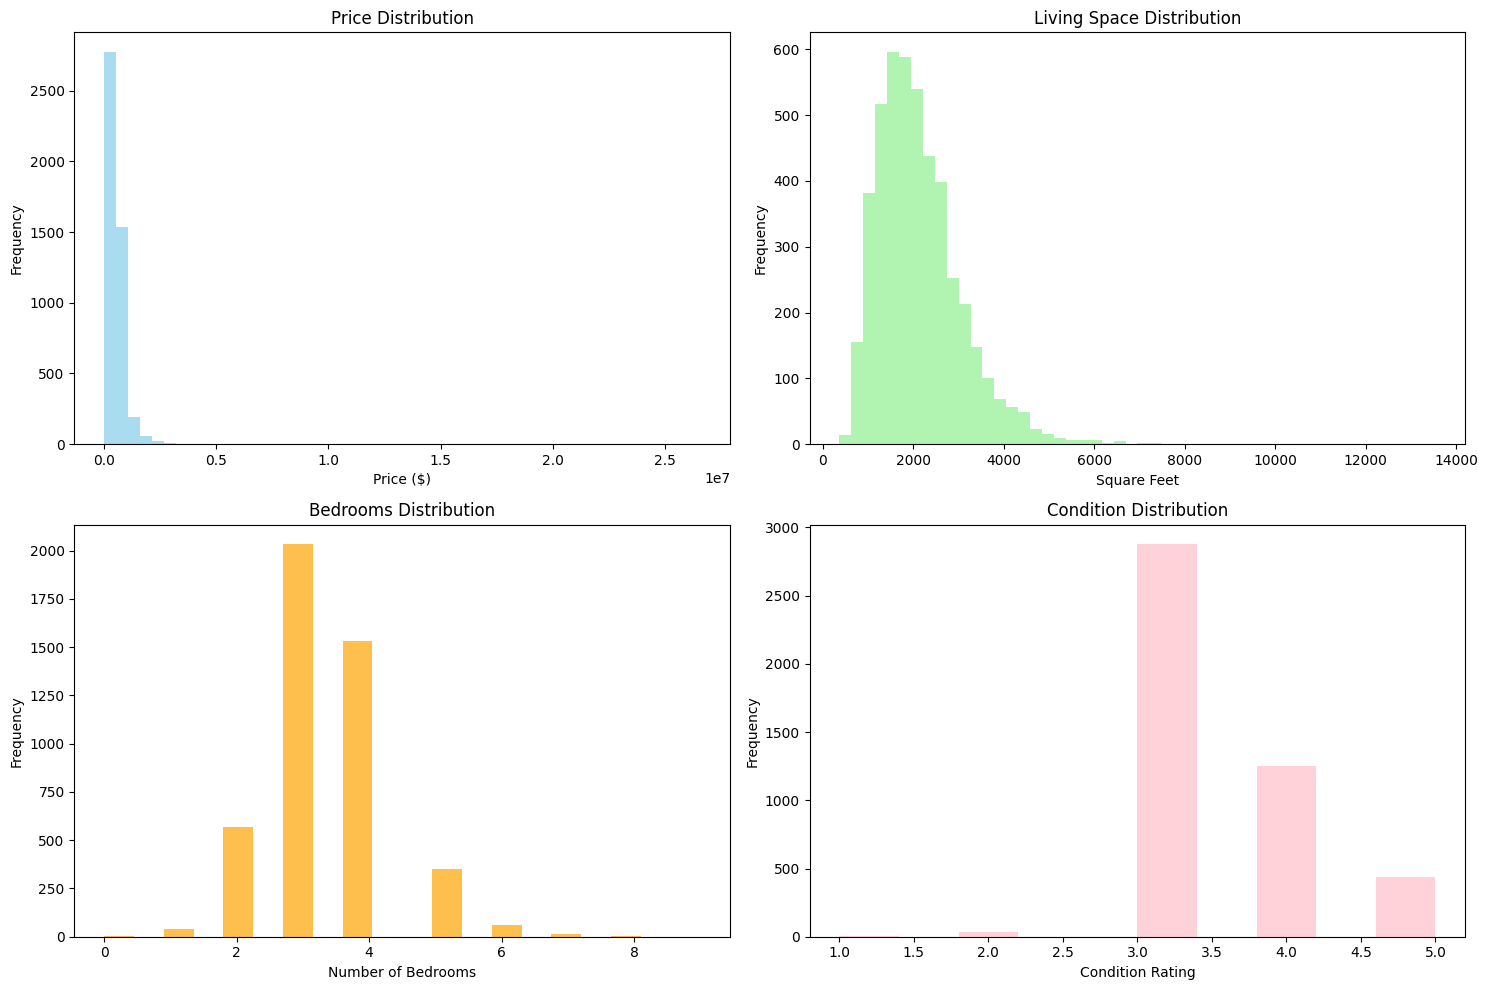

In [7]:
# Create distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price distribution
axes[0,0].hist(df['price'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')

# Living space distribution
axes[0,1].hist(df['sqft_living'], bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Living Space Distribution')
axes[0,1].set_xlabel('Square Feet')
axes[0,1].set_ylabel('Frequency')

# Bedrooms distribution
axes[1,0].hist(df['bedrooms'], bins=20, alpha=0.7, color='orange')
axes[1,0].set_title('Bedrooms Distribution')
axes[1,0].set_xlabel('Number of Bedrooms')
axes[1,0].set_ylabel('Frequency')

# Condition distribution
axes[1,1].hist(df['condition'], bins=10, alpha=0.7, color='pink')
axes[1,1].set_title('Condition Distribution')
axes[1,1].set_xlabel('Condition Rating')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# LR - using sqft living to predict price

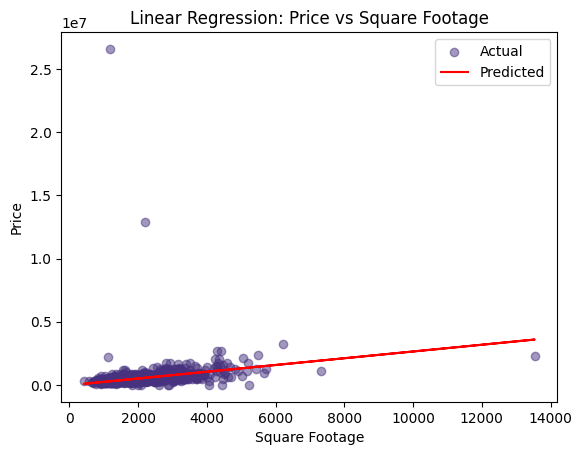

R² Score: 0.029


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X = df[['sqft_living']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Square Footage')
plt.legend()
plt.show()


print(f"R² Score: {model.score(X_test, y_test):.3f}")


#FYI good R² Score is between 0.10 - 0.30


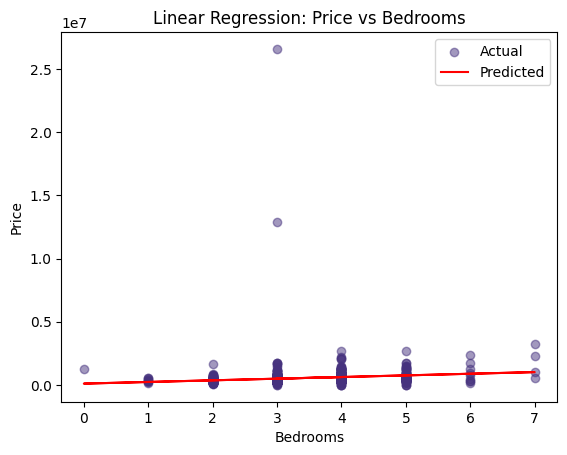

R² Score: 0.006


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X = df[['bedrooms']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Bedrooms')
plt.legend()
plt.show()


print(f"R² Score: {model.score(X_test, y_test):.3f}")


#FYI good R² Score is between 0.10 - 0.30

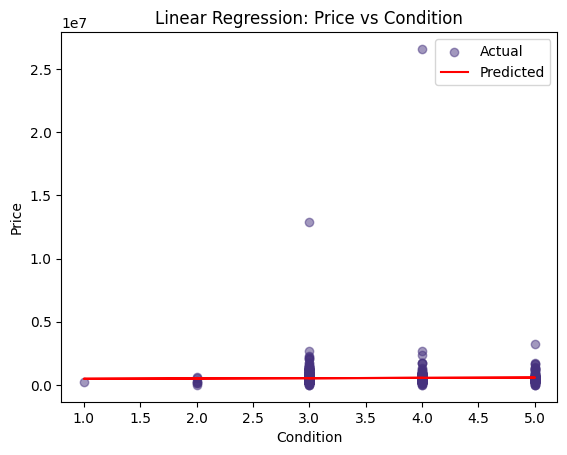

R² Score: -0.000


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X = df[['condition']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Condition')
plt.legend()
plt.show()


print(f"R² Score: {model.score(X_test, y_test):.3f}")


#FYI good R² Score is between 0.10 - 0.30